## 2017년 4월 1일부터, 5월 31일까지 시간별로 서울시 따릉이 대여수와 기상상황 데이터가 주어집니다.

## 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요. 



- id : 고유 id
- hour : 시간
- temperature : 기온
- precipitation : 비 옴 O, 비안옴 X
- windspeed : 풍속(평균)
- humidity : 습도
- visibility : 기상상태에따른 가시성
- ozone : 오존
- pm10 : 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count : 시간에 따른 따릉이 대여 수

In [1]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import platform


if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
submission = pd.read_csv("따릉이/submission.csv")

In [3]:
submission.shape

(715, 2)

In [4]:
train_df = pd.read_csv("D:/Workspace/03.UseDataAnalysis/01.통계학기반의 실전 머신러닝/따릉이/train.csv", sep=',')
train_df

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [5]:
train_df.shape

(1459, 11)

In [6]:
test_df = pd.read_csv("D:/Workspace/03.UseDataAnalysis/01.통계학기반의 실전 머신러닝/따릉이/test.csv", sep=',')
test_df

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [7]:
test_df.shape

(715, 10)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [10]:
train_df.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [11]:
test_df.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [12]:
train_df.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [13]:
print(sorted(train_df.hour.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [14]:
train_df.mean()

id                        1105.914325
hour                        11.493489
hour_bef_temperature        16.717433
hour_bef_precipitation       0.031572
hour_bef_windspeed           2.479034
hour_bef_humidity           52.231297
hour_bef_visibility       1405.216884
hour_bef_ozone               0.039149
hour_bef_pm10               57.168736
hour_bef_pm2.5              30.327124
count                      108.563400
dtype: float64

In [15]:
# train_df = train_df.dropna(subset=['hour_bef_precipitation'], how='any')
# test_df = test_df.dropna(subset=['hour_bef_precipitation'], how='any')

In [16]:
train_df[train_df['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [17]:
fill_mean_func = lambda x: x.fillna(x.mean())

In [18]:
train_df_fn = train_df.apply(fill_mean_func)
train_df_fn.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [19]:
test_df_fn = test_df.apply(fill_mean_func)
test_df_fn.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [20]:
train_df_fn.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056253,-0.003343,-0.017944,0.008948,0.054001,-0.024834,0.003418,-0.002131
hour,-0.010901,1.000000,0.406797,0.021619,0.460624,-0.329200,0.176271,0.368945,-0.033855,-0.057212,0.626047
hour_bef_temperature,-0.000029,0.406797,1.000000,-0.097056,0.375223,-0.496088,0.197417,0.530267,-0.003727,-0.074866,0.618892
hour_bef_precipitation,-0.056253,0.021619,-0.097056,1.000000,0.022744,0.276481,-0.217155,-0.060405,-0.048440,0.004426,-0.163849
hour_bef_windspeed,-0.003343,0.460624,0.375223,0.022744,1.000000,-0.432773,0.251598,0.511100,0.009881,-0.191462,0.458624
hour_bef_humidity,-0.017944,-0.329200,-0.496088,0.276481,-0.432773,1.000000,-0.592244,-0.411417,-0.104700,0.159193,-0.470754
hour_bef_visibility,0.008948,0.176271,0.197417,-0.217155,0.251598,-0.592244,1.000000,0.098962,-0.389383,-0.612117,0.298847
hour_bef_ozone,0.054001,0.368945,0.530267,-0.060405,0.511100,-0.411417,0.098962,1.000000,0.111571,0.016893,0.468719
hour_bef_pm10,-0.024834,-0.033855,-0.003727,-0.048440,0.009881,-0.104700,-0.389383,0.111571,1.000000,0.474259,-0.110884
hour_bef_pm2.5,0.003418,-0.057212,-0.074866,0.004426,-0.191462,0.159193,-0.612117,0.016893,0.474259,1.000000,-0.129398


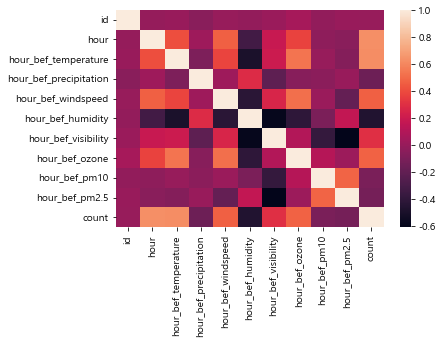

In [21]:
sns.heatmap(train_df_fn.corr())
plt.show()

In [22]:
# 비와 상관성이 높은 컬럼은 습도와 가시성

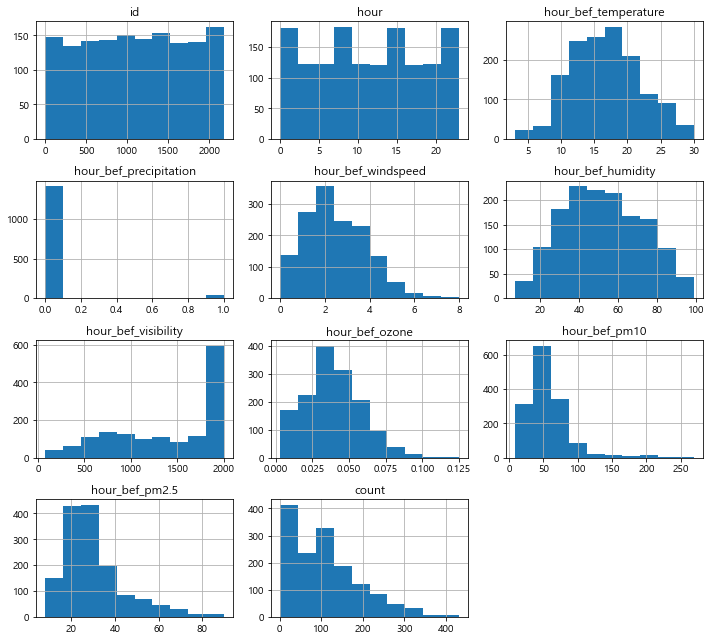

In [23]:
train_df_fn.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

In [24]:
train_df_fn.pivot_table('count', 'hour')

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


In [25]:
train_df_fn['count'].mean()

108.56339958875942

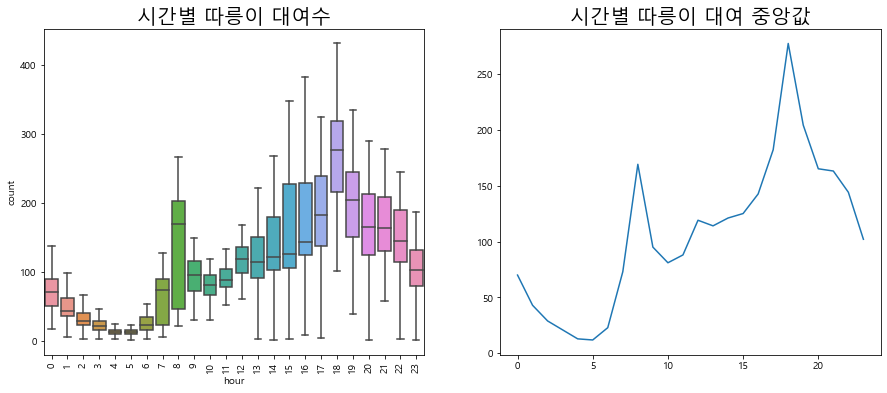

In [26]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="hour", y="count", data=train_df_fn, showfliers=False)
g.set_title('시간별 따릉이 대여수', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.subplot(1,2,2)
plt.plot(train_df_fn.groupby('hour')['count'].median())
plt.title('시간별 따릉이 대여 중앙값', size = 20)
plt.show()

In [27]:
# 08시, 14시 이후로 대여량이 증가, 18시 최고점 이후 내려감, 출퇴근시간에 대여수요가 많은것으로 예측

In [28]:
tdf_nr = train_df_fn[train_df_fn['hour_bef_precipitation'] == 0]
tdf_nr
# 비안올때

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


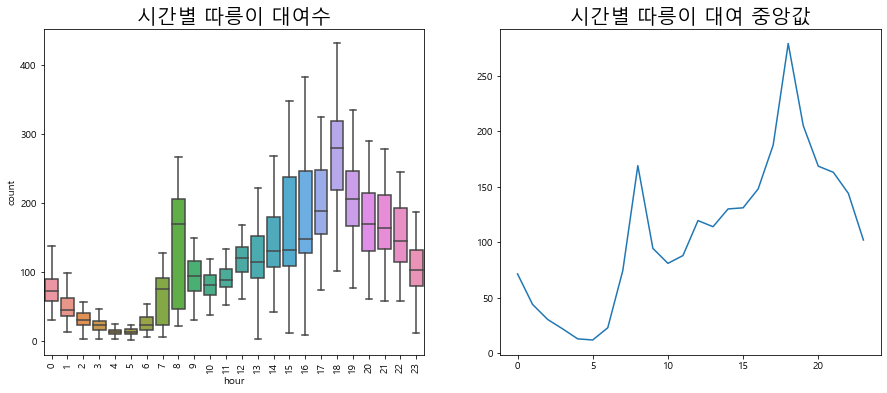

In [29]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="hour", y="count", data=tdf_nr, showfliers=False)
g.set_title('시간별 따릉이 대여수', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.subplot(1,2,2)
plt.plot(tdf_nr.groupby('hour')['count'].median())
plt.title('시간별 따릉이 대여 중앙값', size = 20)
plt.show()

In [30]:
tdf_yr = train_df_fn[train_df_fn['hour_bef_precipitation'] == 1]
# 비올때

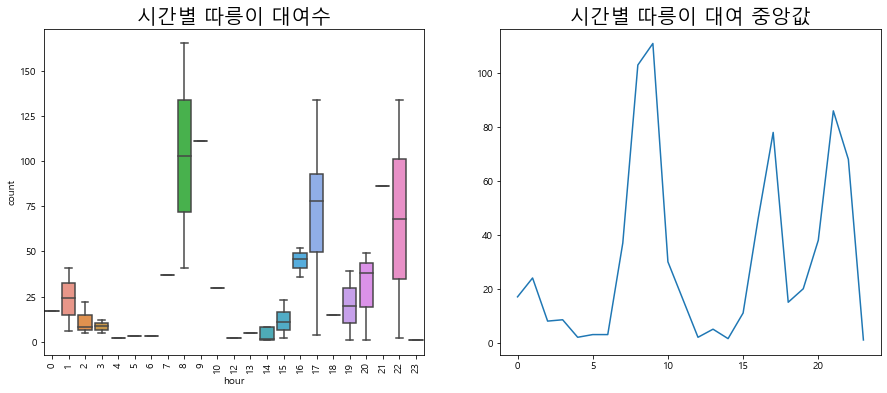

In [31]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="hour", y="count", data=tdf_yr, showfliers=False)
g.set_title('시간별 따릉이 대여수', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.subplot(1,2,2)
plt.plot(tdf_yr.groupby('hour')['count'].median())
plt.title('시간별 따릉이 대여 중앙값', size = 20)
plt.show()

In [32]:
# 비가오면 대여량이 급격하게 줄어듬, 특히 가장 대여량이 높았던 퇴근시간 18시는 대여량이 거의 없음

## 데이터 전처리

In [33]:
from sklearn.preprocessing import StandardScaler
# 값의 범위가 평균 0, 분산 1이 될 수 있도록 값을 일정한 범위로 조정, 
# x값의 값이 크면 y값에 영향을 많이줌, 그러한 일이 없게 값의 단위를 같게 조정.


In [34]:
X_num = train_df_fn[['hour_bef_humidity', 'hour_bef_visibility', 'count']]
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)                 # 훈련
X_scale = scaler.transform(X_num) # 데이터 변환
# X_scale = scaler.fit_transform(X_num) # 같이 할수도 있음

# 스케일링된 데이터 셋을 데이터프레임으로 만들고 범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
X = pd.DataFrame(data = X_scale, index=X_num.index, columns=X_num.columns)

X

,hour_bef_humidity,hour_bef_visibility,count
0,1.806866,-1.423470,-0.721077
1,-0.207932,-0.839811,0.610587
2,1.315452,-0.039855,-0.999516
3,0.086917,-0.788312,-0.624228
4,-2.222730,1.021031,3.903430
...,...,...,...
1454,0.037775,1.021031,-1.060046
1455,-0.355356,1.021031,-1.072152
1456,0.086917,1.021031,-1.047940
1457,-0.748488,-0.017539,1.300632


<AxesSubplot:>

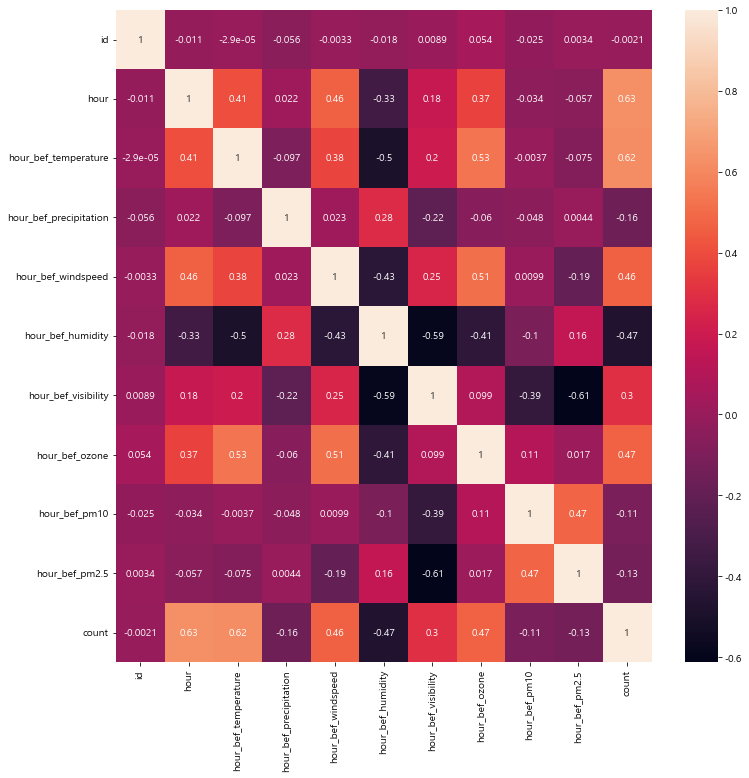

In [35]:
plt.figure(figsize = (12, 12))
sns.heatmap(train_df_fn.corr(), annot = True)

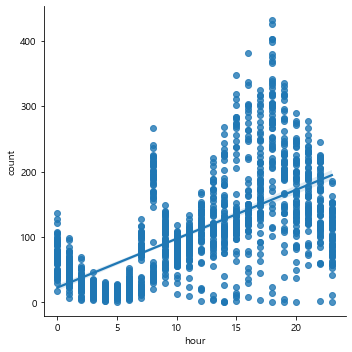

In [36]:
import seaborn as sns

sns.lmplot(x = 'hour', y = 'count', data = train_df_fn)

<AxesSubplot:ylabel='Frequency'>

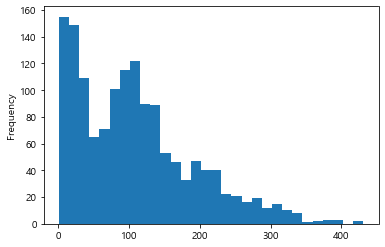

In [37]:
train_df_fn['count'].plot(kind = 'hist', bins = 30)

<AxesSubplot:xlabel='count', ylabel='Density'>

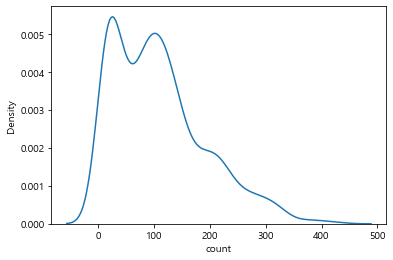

In [38]:
sns.kdeplot(train_df_fn['count'])

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

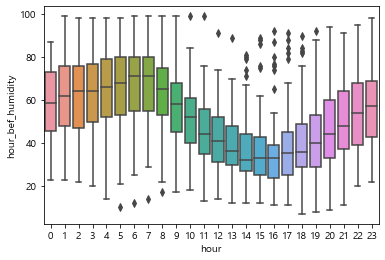

In [39]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train_df_fn)

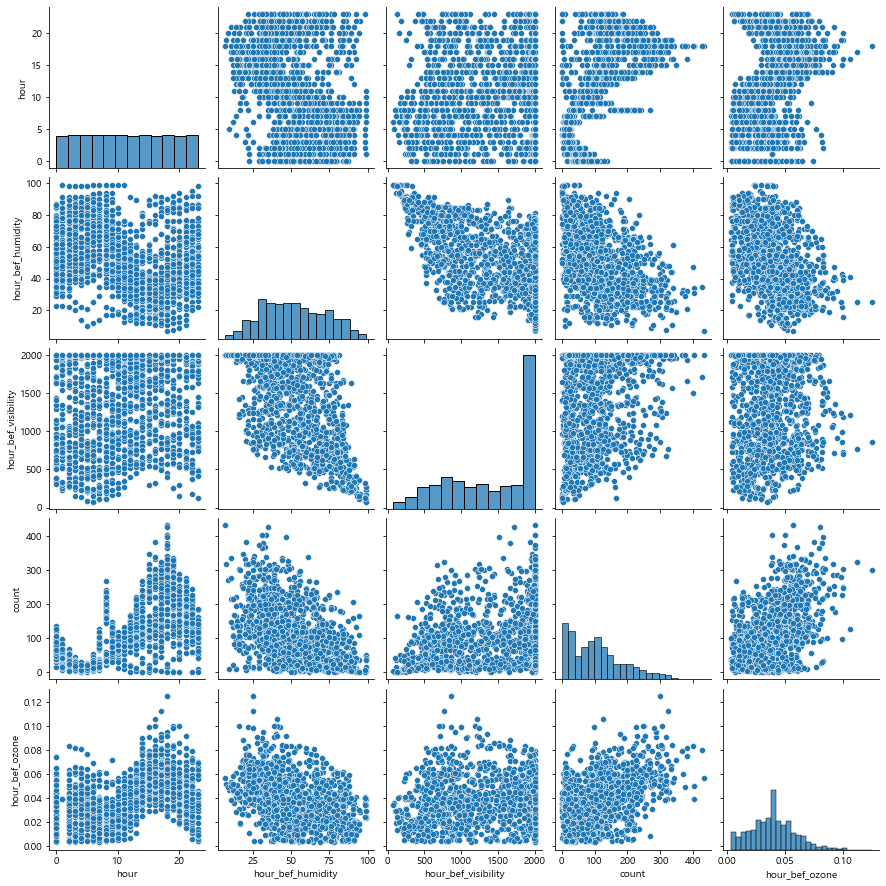

In [40]:
sns.pairplot(train_df_fn[['hour', 'hour_bef_humidity', 'hour_bef_visibility', 'count', 'hour_bef_ozone']])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


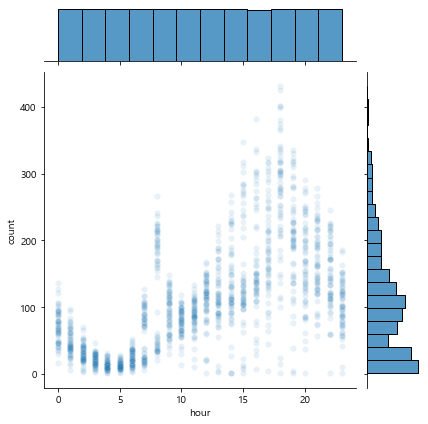

In [41]:
sns.jointplot('hour', 'count', data = train_df_fn, alpha = 0.1)

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

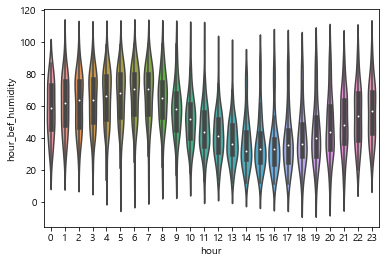

In [42]:
sns.violinplot(x = 'hour', y = 'hour_bef_humidity', data = train_df_fn)

In [43]:
train_df_fn[train_df_fn['hour'] > 12]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...
1448,2168,19,10.6,0.0,0.8,84.0,1091.0,0.033,23.0,22.0,114.0
1450,2170,15,23.1,0.0,4.3,23.0,1798.0,0.064,54.0,29.0,266.0
1453,2173,18,24.8,0.0,3.6,33.0,1262.0,0.084,113.0,49.0,303.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


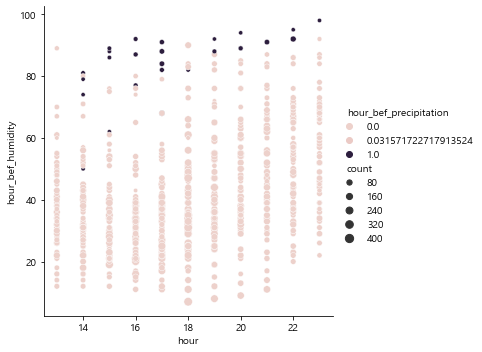

In [44]:
sns.relplot(x = 'hour', y = 'hour_bef_humidity', hue = 'hour_bef_precipitation', size = 'count', data = train_df_fn[train_df_fn['hour'] > 12])

In [45]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs = -1)

In [46]:
column = ['hour', 'hour_bef_temperature']
X_train = train_df_fn[column]
y_train = train_df_fn['count']
X_test = test_df_fn[column]

In [47]:
model_5 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 5)
model_7 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 7)
model_9 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 9)

In [48]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [49]:
np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2154.4346238290263

In [50]:
np.mean(cross_val_score(model_7, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2059.3699019701085

In [51]:
np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1993.3584133742238

In [52]:
model_9.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [53]:
submission['count'] = model_9.predict(X_test)

In [54]:
submission.to_csv('knn_9.csv', index = False)

In [55]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [56]:
submission['count'] = model.predict(X_test)

In [57]:
submission.to_csv('knn_5.csv', index = False)

In [58]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [60]:
X_train = train_df_fn.drop(['id', 'count'], axis = 1)
y_train = train_df_fn['count']
X_test = test_df_fn.drop('id', axis = 1)

In [61]:
X_train.shape, y_train.shape, X_test.shape

((1459, 9), (1459,), (715, 9))

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
RandomForestRegressor()

param = {'min_samples_split': [30, 50, 70],
        'max_depth': [5, 6, 7],
        'n_estimators': [50, 150, 250]}

In [64]:
gs = GridSearchCV(estimator=model, param_grid=param, scoring = 'neg_mean_squared_error', cv = 3)

In [65]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [66]:
submission['count'] = gs.predict(X_test)

submission.to_csv('gridsearch.csv', index = False)

gs.best_params_

{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 250}

In [67]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087467,0.002011,0.004962,5.912054e-06,5,30,50,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2082.761319,-1813.234339,-1747.486268,-1881.160642,145.058211,8
1,0.271305,0.005977,0.013226,1.019541e-03,5,30,150,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2110.722768,-1782.113401,-1761.770958,-1884.869042,159.918485,11
2,0.455990,0.026386,0.019849,1.063059e-03,5,30,250,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2100.176058,-1762.615097,-1788.513938,-1883.768364,153.388189,10
3,0.084476,0.002705,0.004959,1.934572e-05,5,50,50,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2217.560600,-1854.811636,-1799.393796,-1957.255344,185.448832,18
4,0.252794,0.003160,0.011907,2.075687e-05,5,50,150,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2156.008428,-1836.190618,-1823.297994,-1938.499013,153.892417,16
5,0.418616,0.009927,0.019850,1.075359e-03,5,50,250,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2173.492373,-1833.035935,-1823.962627,-1943.496979,162.673482,17
6,0.084485,0.003282,0.005456,8.485379e-07,5,70,50,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2271.165513,-1926.000015,-1869.085041,-2022.083523,177.653609,27
7,0.249304,0.002325,0.012079,6.163436e-04,5,70,150,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2281.868817,-1903.480701,-1841.434586,-2008.928035,194.653424,25
8,0.428048,0.017348,0.019674,8.438250e-04,5,70,250,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2277.791281,-1917.277196,-1844.691347,-2013.253274,189.389271,26
9,0.093090,0.000627,0.005138,2.253741e-04,6,30,50,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-2071.512240,-1703.577288,-1767.785422,-1847.624984,160.467648,6


In [70]:
from sklearn.model_selection import RandomizedSearchCV

param = {'min_samples_split': range(30, 70),
        'max_depth': [5, 6, 7],
        'n_estimators': range(50, 250)}

In [71]:
model = RandomForestRegressor()

In [72]:
rs = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter = 30, random_state=0, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [73]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_split': range(30, 70),
                                        'n_estimators': range(50, 250)},
                   random_state=0, scoring='neg_mean_squared_error')

In [74]:
rs.best_params_

{'n_estimators': 171, 'min_samples_split': 34, 'max_depth': 7}

In [75]:
submission['count'] = rs.predict(X_test)

In [76]:
submission.to_csv('randomsearch.csv', index = False)

In [77]:
pd.DataFrame(rs.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.651348,0.047539,0.025296,0.004535,171,34,7,"{'n_estimators': 171, 'min_samples_split': 34,...",-1659.617759,-1949.241982,-1568.517845,-1819.877633,-1490.882968,-1697.627638,166.800652,1
16,0.574369,0.059289,0.020237,0.000962,139,35,7,"{'n_estimators': 139, 'min_samples_split': 35,...",-1652.049246,-1948.787627,-1607.491299,-1845.999018,-1496.217224,-1710.108883,164.368247,2
29,0.261591,0.010838,0.008233,0.001240,80,42,7,"{'n_estimators': 80, 'min_samples_split': 42, ...",-1735.817269,-1949.878260,-1622.457254,-1866.097075,-1516.027681,-1738.055508,157.434331,3
19,0.218141,0.011831,0.010515,0.000962,56,43,7,"{'n_estimators': 56, 'min_samples_split': 43, ...",-1709.238734,-1925.602539,-1597.323931,-1933.770934,-1527.942229,-1738.775673,166.288422,4
17,0.835463,0.012535,0.028868,0.000371,233,44,7,"{'n_estimators': 233, 'min_samples_split': 44,...",-1708.662290,-2003.659374,-1622.416170,-1875.733024,-1521.056305,-1746.305433,173.485030,5
3,0.395809,0.043901,0.014285,0.000909,98,48,7,"{'n_estimators': 98, 'min_samples_split': 48, ...",-1757.843265,-2005.788042,-1612.959231,-1879.985770,-1540.208662,-1759.356994,170.141207,6
6,0.322301,0.050788,0.013492,0.003948,75,36,6,"{'n_estimators': 75, 'min_samples_split': 36, ...",-1739.876807,-2019.386725,-1655.235726,-1851.806864,-1531.850563,-1759.631337,166.818437,7
18,0.617025,0.023031,0.025792,0.003906,177,41,6,"{'n_estimators': 177, 'min_samples_split': 41,...",-1733.678316,-1990.070725,-1667.781545,-1884.709915,-1550.874348,-1765.422970,155.736105,8
14,0.365949,0.010828,0.014186,0.001114,102,49,7,"{'n_estimators': 102, 'min_samples_split': 49,...",-1740.336510,-2028.807576,-1649.231202,-1890.902242,-1544.378739,-1770.731254,172.026753,9
2,0.434596,0.044989,0.016070,0.003599,95,39,6,"{'n_estimators': 95, 'min_samples_split': 39, ...",-1718.345360,-2029.149492,-1679.226791,-1865.213495,-1566.193739,-1771.625775,160.409365,10


In [78]:
model.fit(X_train, y_train)

RandomForestRegressor()

<AxesSubplot:xlabel='n_estimators'>

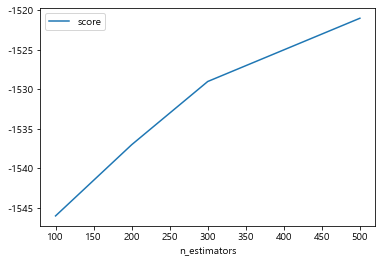

In [79]:
submission['count'] = model.predict(X_test)

submission.to_csv('rf_default.csv', index = False)

model_100 = RandomForestRegressor(n_estimators=100, n_jobs = -1, random_state=10)
model_200 = RandomForestRegressor(n_estimators=200, n_jobs = -1, random_state=10)
model_300 = RandomForestRegressor(n_estimators=300, n_jobs = -1, random_state=10)
model_500 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10)

pd.DataFrame({'n_estimators':[100, 200, 300, 500], 'score':[-1546, -1537, -1529, -1521]}).plot('n_estimators', 'score')

In [80]:
%%time
score = cross_val_score(model_100, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1546.8865621858963
Wall time: 694 ms


In [81]:
%%time
score = cross_val_score(model_200, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1537.2335820896296
Wall time: 1.18 s


In [82]:
%%time
score = cross_val_score(model_300, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1529.93820386781
Wall time: 1.74 s


In [83]:
%%time
score = cross_val_score(model_500, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1521.7993785402248
Wall time: 3.07 s


In [84]:
model_sam_30 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)
model_sam_50 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=50)
model_sam_100 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=100)

In [85]:
%%time
score = cross_val_score(model_sam_30, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1647.5599150463909
Wall time: 2.49 s
